In [9]:
from pytomoatt.model import ATTModel

In [10]:
input_file = "../6_checkerboard_inversion_test/input_params/input_params_inv_abs.yaml"

fname_init = "../0_generate_files_for_TomoATT/2_models/model_init_N61_61_61.h5"
model_init = ATTModel.read(fname_init,input_file)    

fname = "../0_generate_files_for_TomoATT/2_models/model_ckb_N61_61_61.h5"
model_ckb = ATTModel.read(fname,input_file)    
model_ckb.calc_dv(fname_init)

fname = "../6_checkerboard_inversion_test/OUTPUT_FILES/OUTPUT_FILES_inv_abs/final_model.h5"
model_inv = ATTModel.read(fname,input_file)    
model_inv.calc_dv(fname_init)



bm_init = model_init.to_xarray()
bm_ckb  = model_ckb.to_xarray()
bm_inv  = model_inv.to_xarray()



d:\my_software\python\lib\site-packages\pytomoatt\model.py:72: RuntimeWarning: invalid value encountered in divide
  self.phi[idx] = 90 + 0.5*atand(self.eta[idx]/self.xi[idx])


In [14]:
xshift = [ 3,  10.0, -10.0, 10.0, ]
yshift = [ 80,  0,   -10.0,    0, ]
frame = [
    ["xa2","ya1","NsWe"], ["xa2","ya1","NswE"],
]

projection = "M8c"

region = [model_init.min_max_lon[0],model_init.min_max_lon[1],model_init.min_max_lat [0],model_init.min_max_lat [1]]

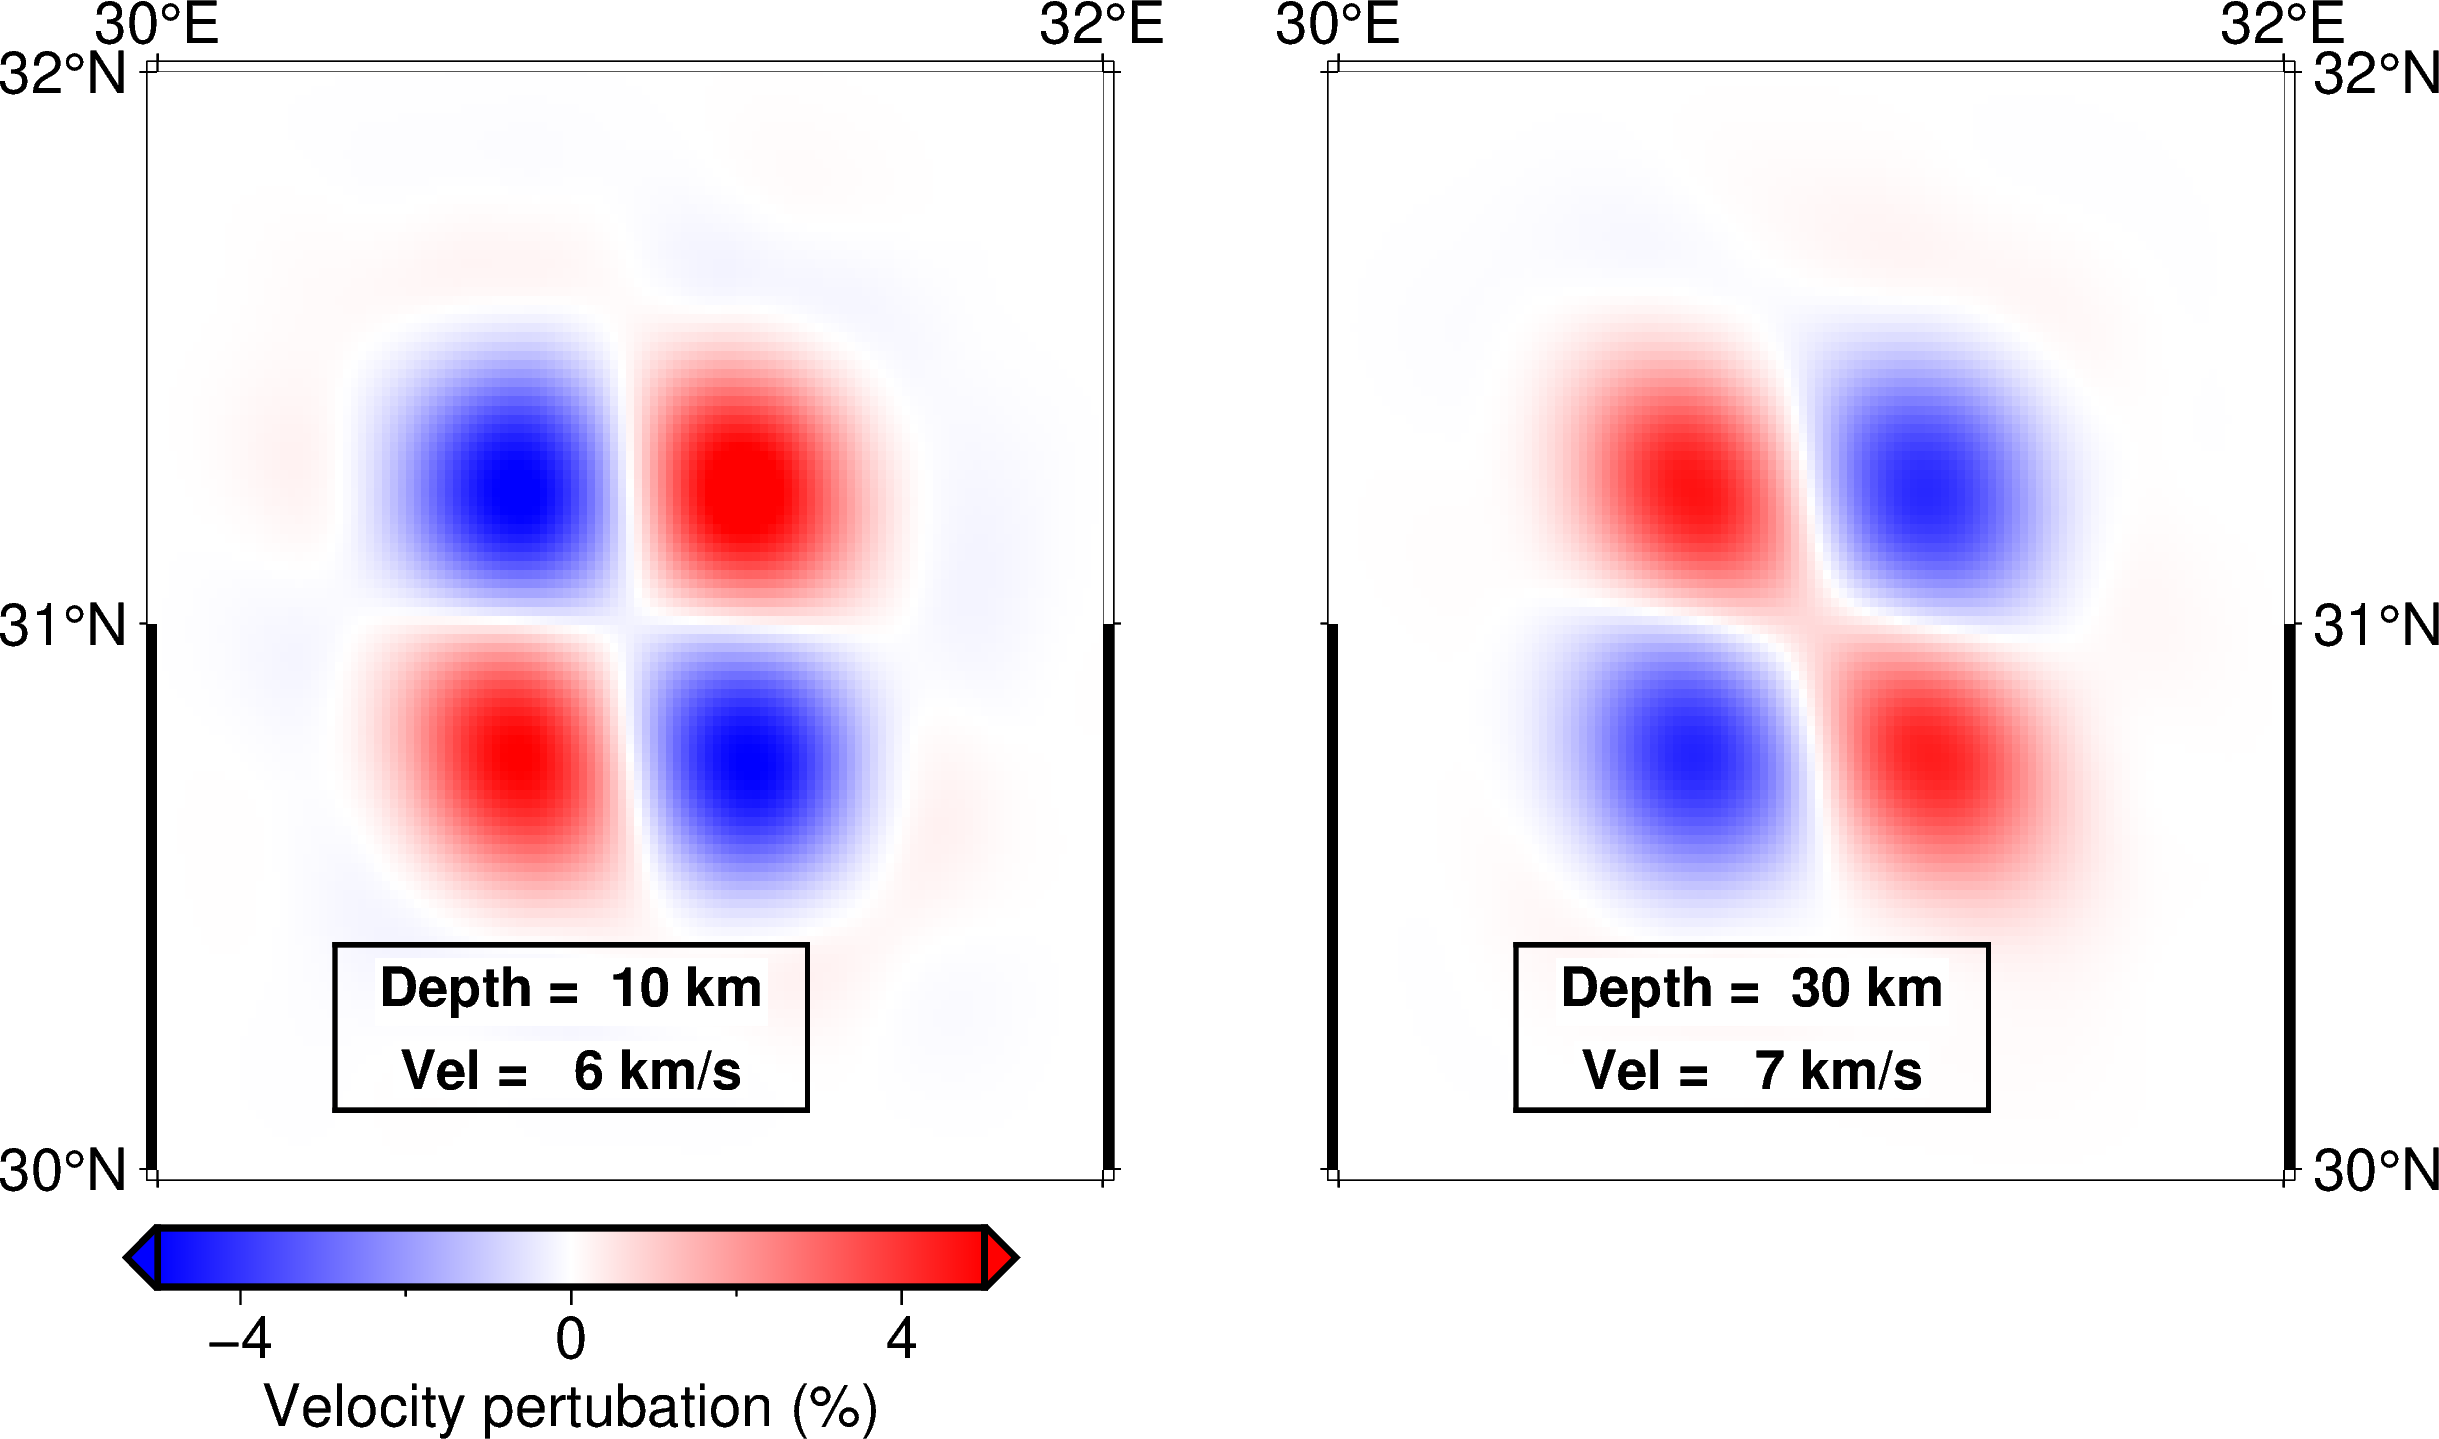

In [25]:
import pygmt
import numpy as np


# 开始画图
with pygmt.clib.Session() as session:
    session.call_module('gmtset', 'FONT 14p')
fig = pygmt.Figure()
pygmt.config(IO_SEGMENT_MARKER="<<<")

all_dep = [10,30]

for i in range(0,len(all_dep)):

    lon         = bm_inv.interp_dep(all_dep[i],"vel")[:,0]
    lat         = bm_inv.interp_dep(all_dep[i],"vel")[:,1]

    pert        = bm_inv.interp_dep(all_dep[i],"dlnv")[:,2]
    ave         = np.mean(bm_inv.interp_dep(all_dep[i],"vel")[:,2])

    # ----------- 画布 ----------------
    fig.shift_origin(xshift=xshift[i],yshift = yshift[i])

    fig.basemap(
        frame=frame[i],                # 坐标轴 -B 的属性  "xa10f5+lLABELNAME" a 表示annotation 的间距, f 表示线的间距, l表示label名称
        projection=projection,  # 投影方式
        region=region,       # 区域范围 
    )

    pygmt.makecpt(cmap="polar", series=[-5, 5], background = True)
    grid = pygmt.surface(x=lon, y=lat, z=pert, spacing="01m", region=region)
    fig.grdimage(grid = grid)


    fig.shift_origin(xshift = 1.5,yshift =  0.5)
    fig.basemap( frame=["NSEW"], projection="X4/1.4", region=[0,1,0,1],)
    fig.text(text="Depth = %3d km"%(all_dep[i]), x=0.5, y=0.75, font="13p,Helvetica-Bold,black", fill="white")
    fig.text(text="Vel = %3d km/s"%(ave), x=0.5, y=0.25, font="13p,Helvetica-Bold,black", fill="white")
    fig.shift_origin(xshift =-1.5,yshift = -0.5)

fig.shift_origin(xshift =  -10, yshift = -1)
fig.colorbar(frame = ["a4f2","x+lVelocity pertubation (%)"], position="+e+w7c/0.5c+h", ) # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
fig.shift_origin(xshift =   10, yshift =  1)

fig.show()

fig.savefig('figs/fig2_1_inv_model_pert.jpg')


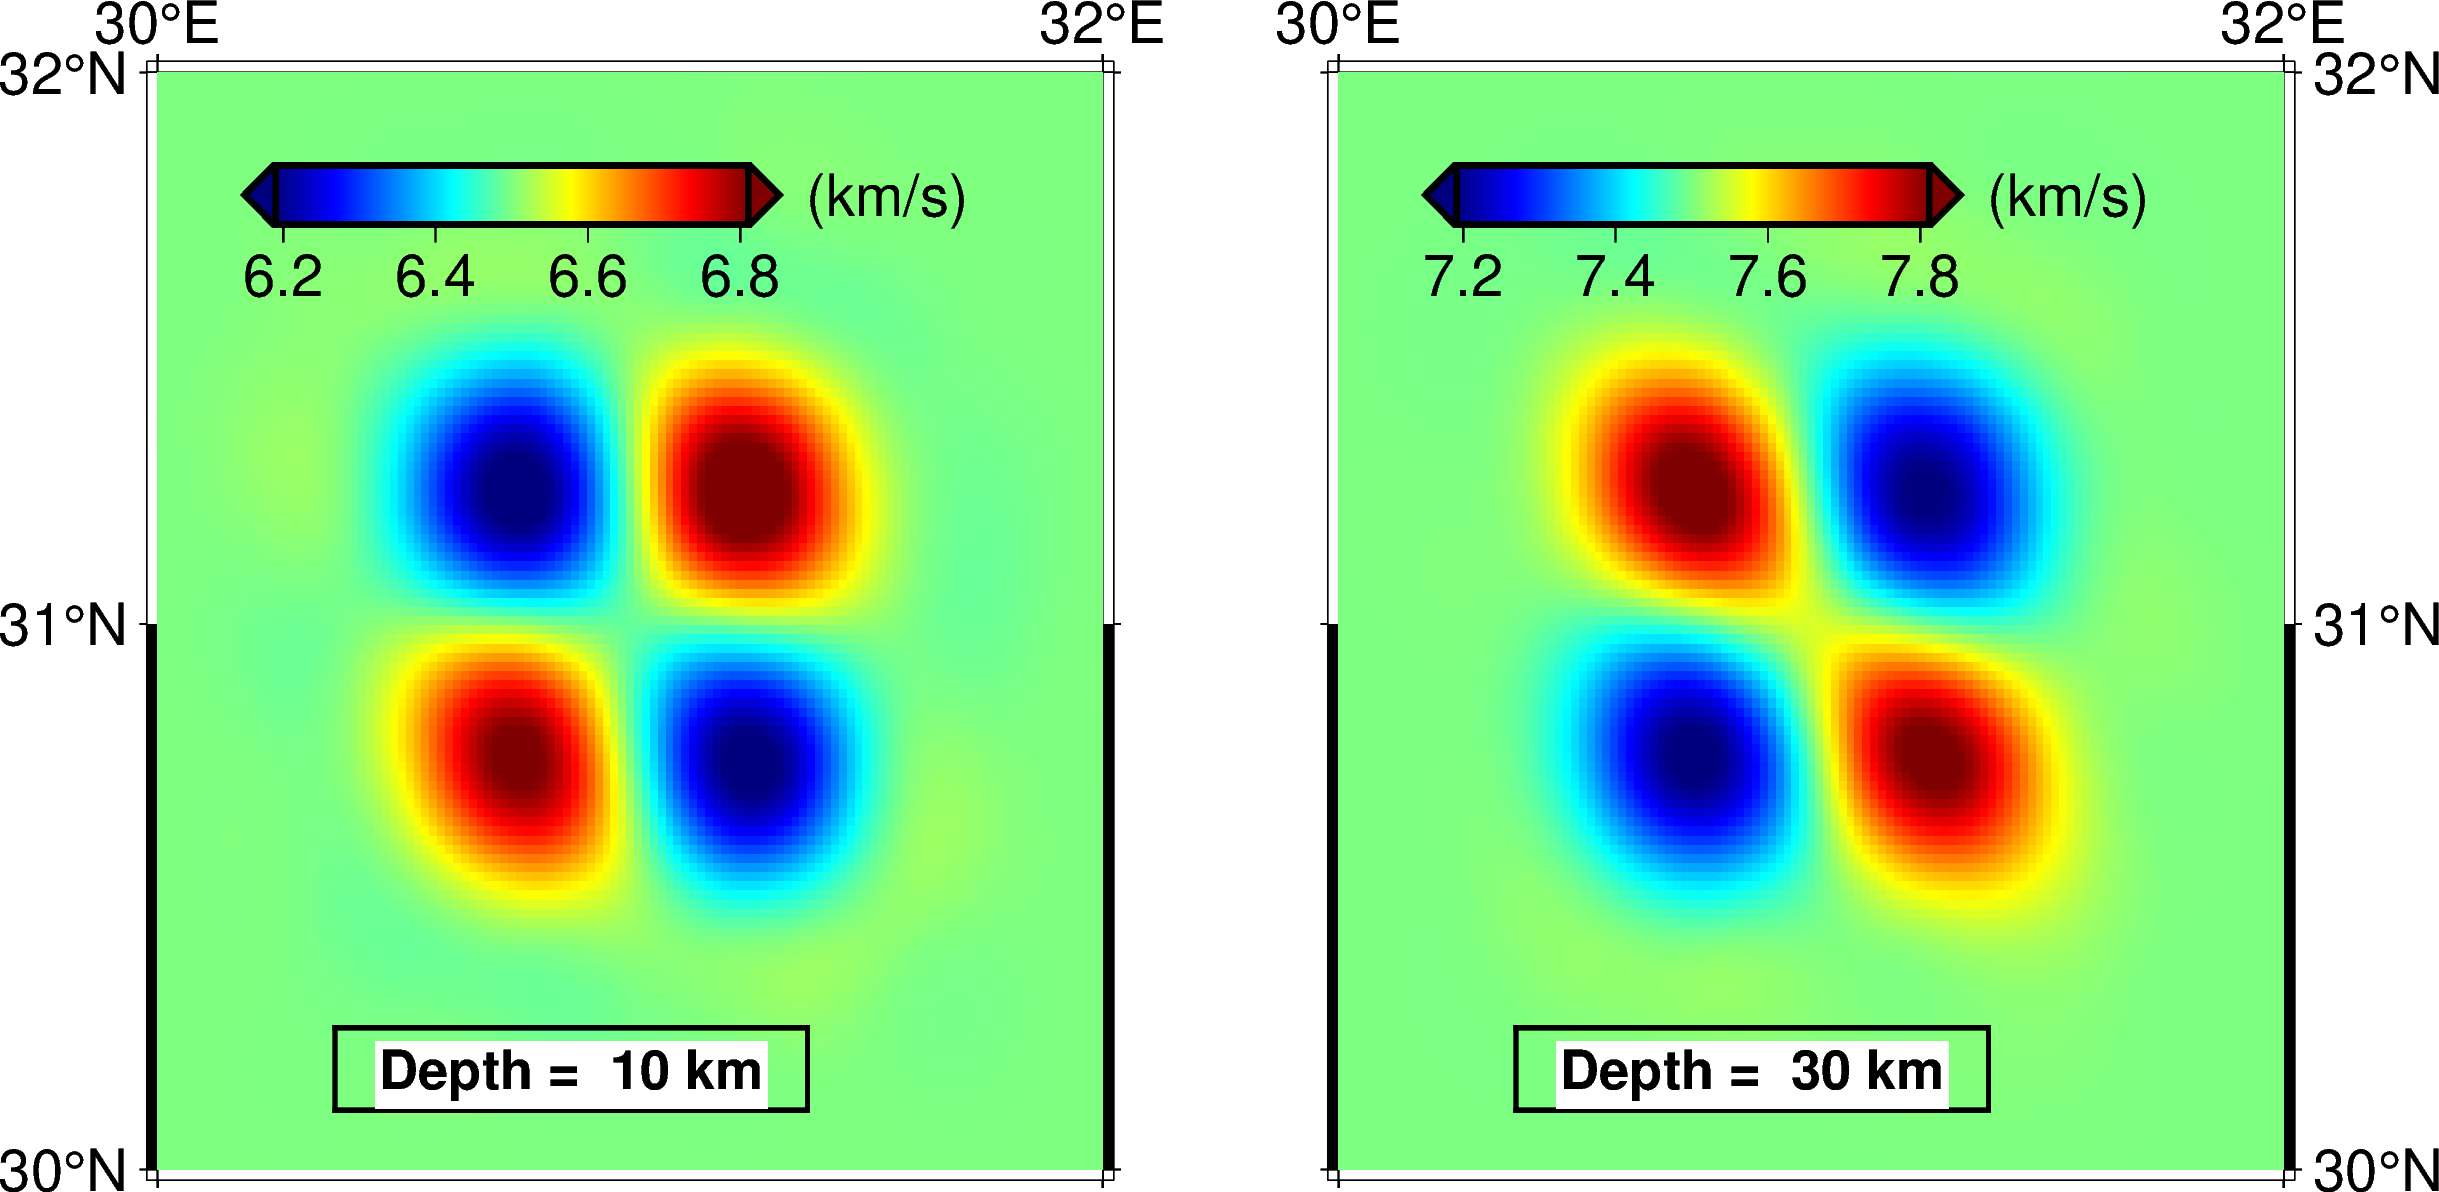

In [30]:
# 开始画图
with pygmt.clib.Session() as session:
    session.call_module('gmtset', 'FONT 14p')
fig = pygmt.Figure()
pygmt.config(IO_SEGMENT_MARKER="<<<")

all_dep = [10,30]

for i in range(0,len(all_dep)):

    lon         = bm_inv.interp_dep(all_dep[i],"vel")[:,0]
    lat         = bm_inv.interp_dep(all_dep[i],"vel")[:,1]

    vel        = bm_inv.interp_dep(all_dep[i],"vel")[:,2]
    ave         = np.mean(bm_inv.interp_dep(all_dep[i],"vel")[:,2])

    # ----------- 画布 ----------------
    fig.shift_origin(xshift=xshift[i],yshift = yshift[i])

    fig.basemap(
        frame=frame[i],                # 坐标轴 -B 的属性  "xa10f5+lLABELNAME" a 表示annotation 的间距, f 表示线的间距, l表示label名称
        projection=projection,  # 投影方式
        region=region,       # 区域范围 
    )

    pygmt.makecpt(cmap="jet", series=[ave-0.31, ave+0.31], background = True)
    grid = pygmt.surface(x=lon, y=lat, z=vel, spacing="01m", region=region)
    fig.grdimage(grid = grid)


    fig.shift_origin(xshift = 1.5,yshift =  0.5)
    fig.basemap( frame=["NSEW"], projection="X4/0.7", region=[0,1,0,1],)
    fig.text(text="Depth = %3d km"%(all_dep[i]), x=0.5, y=0.5, font="13p,Helvetica-Bold,black", fill="white")
    fig.shift_origin(xshift =-1.5,yshift = -0.5)

    fig.shift_origin(xshift =  1, yshift =  8)
    fig.colorbar(frame = ["a0.2","y+l (km/s)"], position="+e+w4c/0.5c+h", ) # +e,默认是双箭头，f表示forward，b表示background ，w表示长宽，h表示水平
    fig.shift_origin(xshift = -1, yshift = -8)



fig.show()

fig.savefig('figs/fig2_2_inv_model_vel.jpg')
